Trying to come up with some metrics to detect overflow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('consolidated.csv')

In [3]:
data.head()

,Create-time,ncalls,Avg-time,Period,nagents
0,2020-07-18 00:00:00,0,NaN,2020-07-18,56
1,2020-07-18 00:05:00,0,NaN,2020-07-18,56
2,2020-07-18 00:10:00,1,13.0,2020-07-18,56
3,2020-07-18 00:15:00,0,NaN,2020-07-18,56
4,2020-07-18 00:20:00,0,NaN,2020-07-18,56


In [4]:
data['Avg-time'] = data['Avg-time'].fillna(0)

In [5]:
data.head()

,Create-time,ncalls,Avg-time,Period,nagents
0,2020-07-18 00:00:00,0,0.0,2020-07-18,56
1,2020-07-18 00:05:00,0,0.0,2020-07-18,56
2,2020-07-18 00:10:00,1,13.0,2020-07-18,56
3,2020-07-18 00:15:00,0,0.0,2020-07-18,56
4,2020-07-18 00:20:00,0,0.0,2020-07-18,56


In [6]:
data['ma-calls'] = data['ncalls'].rolling(window=6).mean()

In [7]:
data.set_index('Create-time', inplace=True)

In [8]:
data.loc['2020-07-20 08:00:00':'2020-07-20 09:00:00']

,ncalls,Avg-time,Period,nagents,ma-calls
Create-time,,,,,
2020-07-20 08:00:00,1,498.000000,2020-07-20,76,1.333333
2020-07-20 08:05:00,2,355.500000,2020-07-20,76,1.166667
2020-07-20 08:10:00,3,155.000000,2020-07-20,76,1.666667
2020-07-20 08:15:00,6,510.833333,2020-07-20,76,2.500000
2020-07-20 08:20:00,2,107.000000,2020-07-20,76,2.833333
2020-07-20 08:25:00,5,289.400000,2020-07-20,76,3.166667
2020-07-20 08:30:00,3,479.333333,2020-07-20,76,3.500000
2020-07-20 08:35:00,0,0.000000,2020-07-20,76,3.166667
2020-07-20 08:40:00,4,222.250000,2020-07-20,76,3.333333


In [9]:
import datetime
time_vals = [d[11:16] for d in data.loc['2020-07-20 08:00:00':'2020-07-20 23:55:00'].index.values.tolist()]
time_ticks = [time_vals[i] for i in range(0, len(time_vals), 20)]
time_ticks = time_ticks.append('00:40')

In [10]:
print(time_ticks)

None


/home/ajoshi/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


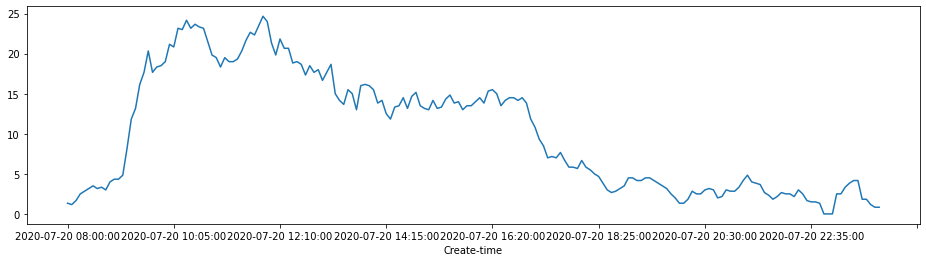

In [11]:
ax = data.loc['2020-07-20 08:00:00':'2020-07-20 23:55:00']['ma-calls'].plot(figsize=(16, 4))

**Question:**
Given a number of agents, average time to complete a task and rate the incoming calls what is the average waiting time?

The number of agents on a day is known. We should be able to plot another curve on this chart which indicates the maximum inflow we can sustain without dropping quality. That should give our first indication of things slipping out of control. In fact, we can add yet another curve that indicates that we are approaching danger.

One may not be able to infer the queue length as easily as forecast ASA. I think the business tracks ASA and not the queue length. Refer to equation (1.4) in the paper 'Evaluating the Erlang C and Erlang A Models for Call Center Modeling'. File name is 'Erlang Compare Working paper.pdf'.
